In [1]:
import statsmodels.api as sm
import pandas as pd
from sklearn import preprocessing
import pymc3 as pm
import numpy as np
from scipy.stats import chi2
from patsy import dmatrices

from statsmodels.graphics.api import abline_plot
import matplotlib.pyplot as plt

# Exercise 6.6

### Preparing Datasets

In [2]:
m = [33, 63, 157, 38, 108, 159]
nm = [3271-33, 7256-63, 5065 - 157, 2486-38, 8877-108, 3520-159]
s = ['M'] * 3 + ['F'] * 3
a = ['<=13', '14-18', '19~'] * 2
df = pd.DataFrame({'missing' : m, 'notMissing' : nm, 'sex' : s, 'age' : a})

In [3]:
df

,missing,notMissing,sex,age
0,33,3238,M,<=13
1,63,7193,M,14-18
2,157,4908,M,19~
3,38,2448,F,<=13
4,108,8769,F,14-18
5,159,3361,F,19~


### Fitting

In [4]:
y, X = dmatrices('missing + notMissing ~ sex + age', data=df, return_type='dataframe')
model = sm.GLM(y, X, family = sm.families.Binomial())
res = model.fit()
print(res.summary())

                     Generalized Linear Model Regression Results                     
Dep. Variable:     ['missing', 'notMissing']   No. Observations:                    6
Model:                                   GLM   Df Residuals:                        2
Model Family:                       Binomial   Df Model:                            3
Link Function:                         logit   Scale:                          1.0000
Method:                                 IRLS   Log-Likelihood:                -18.551
Date:                       Thu, 13 Aug 2020   Deviance:                     0.098749
Time:                               13:03:48   Pearson chi2:                   0.0989
No. Iterations:                            8                                         
Covariance Type:                   nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------

### Result

In [5]:
yhat = res.mu
y = df['missing']/(df['missing']+df['notMissing'])

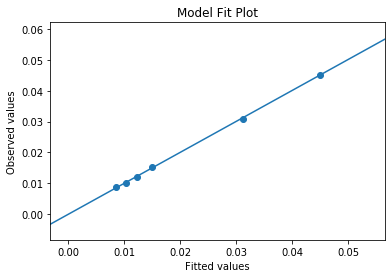

In [6]:
fig, ax = plt.subplots()
ax.scatter(yhat, y)
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)


ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

# Exercise 6.9

In [7]:
D = [45, 15, 40, 83, 90, 25, 35, 65, 95, 35, 75, 45,
     50, 75, 30, 25, 20, 60, 70, 30, 60, 61, 65, 15,
     20, 45, 15, 25, 15, 30, 40, 15, 135, 20, 40]
T = [0,0,0,1,1,1,0,0,0,0,0,1,
    1,1,0,0,1,1,1,0,0,0,0,1,
    1,0,1,0,1,0,0,1,1,1,1]
Y = [0,0,1,1,1,1,1,1,1,1,1,1,
     0,1,0,1,0,1,1,1,1,0,1,0,
     0,1,0,1,0,1,1,0,1,0,0]
df= pd.DataFrame({'D' : D, 'T' :T, 'Y': Y})
df.head()

,D,T,Y
0,45,0,0
1,15,0,0
2,40,0,1
3,83,1,1
4,90,1,1


In [8]:
y, X = dmatrices('Y ~ D + T + D:T', data=df, return_type='dataframe')
model1 = sm.GLM(y, X, family = sm.families.Binomial())
model2 = sm.GLM(y, X[['Intercept', 'D']], family = sm.families.Binomial())
model3 = sm.GLM(y, X[['Intercept', 'T']], family = sm.families.Binomial())
model4 = sm.GLM(y, X[['Intercept', 'D', 'T']], family = sm.families.Binomial())
res1 = model1.fit()
res2 = model2.fit()
res3 = model3.fit()
res4 = model4.fit()

In [9]:
yhat1 = res1.mu
yhat2 = res2.mu
yhat3 = res3.mu
yhat4 = res4.mu
y = df['Y']
line_fit1 = sm.OLS(y, sm.add_constant(yhat1, prepend=True)).fit()
line_fit2 = sm.OLS(y, sm.add_constant(yhat2, prepend=True)).fit()
line_fit3 = sm.OLS(y, sm.add_constant(yhat3, prepend=True)).fit()
line_fit4 = sm.OLS(y, sm.add_constant(yhat4, prepend=True)).fit()

print("R-square D, T, DT : %.3f" %line_fit1.rsquared)
print("R-square D : %.3f" %line_fit2.rsquared)
print("R-square T : %.3f" %line_fit3.rsquared)
print("R-square D, T : %.3f" %line_fit4.rsquared)

R-square D, T, DT : 0.435
R-square D : 0.307
R-square T : 0.101
R-square D, T : 0.426


# Exercise 6.12

In [10]:
Admit = [512, 353, 120, 138, 53, 22,
         89, 17, 202, 131, 94, 24]
NotAdmit = [313, 207, 205, 279, 138, 351,
            19, 8, 391, 244, 299, 317]
Sex = ['M']*6 +['F']*6
Dept = ['A', 'B', 'C', 'D', 'E', 'F']*2

df = pd.DataFrame({'A' : Admit, 'N' : NotAdmit, 'Sex' : Sex, 'Dept' : Dept})
y, X = dmatrices('A + N ~ Dept', data = df, return_type='dataframe')

In [11]:
model = sm.GLM(y, X, family = sm.families.Binomial())
res = model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             ['A', 'N']   No. Observations:                   12
Model:                            GLM   Df Residuals:                        6
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45.338
Date:                Thu, 13 Aug 2020   Deviance:                       21.736
Time:                        13:03:48   Pearson chi2:                     19.9
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5935      0.068      8.679      0.0

In [12]:
influence = res.get_influence()
leverage = influence.hat_matrix_diag
standardized_residuals = influence.resid_studentized
print("standardized residuals : ", standardized_residuals)

standardized residuals :  [-4.15307277 -0.50370774  0.8680662  -0.54587324  1.00053418 -0.6197526
  4.15307277  0.50370774 -0.8680662   0.54587324 -1.00053418  0.6197526 ]


In [13]:
print("P-value : %.4f" %chi2.sf(res.pearson_chi2, df = 6))

P-value : 0.0028


In [14]:
(standardized_residuals**2 * (1-leverage)).sum() 

19.93841337788069

# Exercise 6.15

### Data preparation

In [15]:
Cured = [0 , 0, 3, 0, 6, 2, 5, 6, 2, 5]
Died = [6, 5, 3, 6, 0, 4, 1, 0, 0, 0]
Delay = ['None', '1.5h']*5
Level = ['1/8', '1/8', '1/4', '1/4', '1/2', '1/2', '1', '1', '4', '4']
df = pd.DataFrame({'C' : Cured, 'D' : Died, 'Delay' : Delay, 'Level' : Level})

In [16]:
y, X = dmatrices('C + D ~ Delay + Level', data = df, return_type='dataframe')

In [17]:
model = sm.GLM(y, X, family = sm.families.Binomial())
res0 = model.fit()
print(res0.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             ['C', 'D']   No. Observations:                   10
Model:                            GLM   Df Residuals:                        4
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6.9330
Date:                Thu, 13 Aug 2020   Deviance:                       7.4943
Time:                        13:03:48   Pearson chi2:                     12.6
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.7130      1.085      1.579

### No intercept term

In [18]:
model = sm.GLM(y, X.iloc[:,1:], family = sm.families.Binomial())
res1 = model.fit()
print(res1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             ['C', 'D']   No. Observations:                   10
Model:                            GLM   Df Residuals:                        5
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8.6880
Date:                Thu, 13 Aug 2020   Deviance:                       11.004
Time:                        13:03:48   Pearson chi2:                     8.58
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Delay[T.None]     2.9266      1.106      2.647

### Likelihood-ratio test of XY conditional independence using Logistic model

In [19]:
model = sm.GLM(y,  X.iloc[:,[0, 2, 3, 4, 5]], family = sm.families.Binomial())
res2 = model.fit()
print(res2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             ['C', 'D']   No. Observations:                   10
Model:                            GLM   Df Residuals:                        5
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10.333
Date:                Thu, 13 Aug 2020   Deviance:                       14.294
Time:                        13:03:48   Pearson chi2:                     11.1
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.3979      1.044      2.296   

In [20]:
G = res2.deviance-res0.deviance
print("G(M|M0) = %.3f" %G)
print("p-value : %.3f" %chi2.sf(G, 1))

G(M|M0) = 6.799
p-value : 0.009


Thus, XY is conditionally independent

# Exercise 7.3

In [21]:
from math import exp
scaler = preprocessing.StandardScaler()
Dosage = [exp(1.6907), exp(1.7242), exp(1.7552), exp(1.7842), exp(1.8113), exp(1.8369), exp(1.8610), exp(1.8839)]
Dosage = np.array(Dosage).reshape(-1, 1)
Dosage = scaler.fit_transform(Dosage).flatten()
Killed = [6, 13, 18, 28, 52, 53, 61, 60]
Alive  = [53, 47, 44, 28, 11, 6, 1, 0]
df = pd.DataFrame({'A' : Alive, 'K' : Killed, 'D' : Dosage})

In [23]:
y, X = dmatrices('A + K ~ D', data=df, return_type='dataframe')
model_logit = sm.GLM(y, X, family = sm.families.Binomial(link = sm.families.links.logit))
model_probit = sm.GLM(y, X, family = sm.families.Binomial(link = sm.families.links.probit))
model_CLogLog = sm.GLM(y, X, family = sm.families.Binomial(link = sm.families.links.cloglog))
res_logit = model_logit.fit()
res_probit = model_probit.fit()
res_CLogLog = model_CLogLog.fit()
print(res_logit.summary())
print(res_probit.summary())
print(res_CLogLog.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             ['A', 'K']   No. Observations:                    8
Model:                            GLM   Df Residuals:                        6
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17.852
Date:                Thu, 13 Aug 2020   Deviance:                       9.5067
Time:                        13:04:00   Pearson chi2:                     8.45
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7842      0.140     -5.586      0.0

/Users/jinhwansuk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  
/Users/jinhwansuk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jinhwansuk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  after removing the cwd from sys.path.


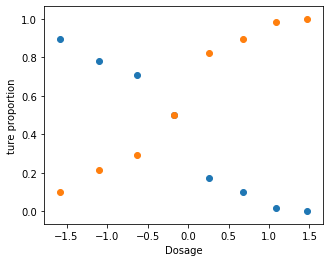

In [24]:
plt.figure(figsize = (5, 4))
plt.scatter(Dosage, y['A']/(y['A']+y['K']))
plt.scatter(Dosage, 1 - y['A']/(y['A']+y['K']))
plt.xlabel("Dosage")
plt.ylabel("ture proportion")
plt.show()

# Exercise 7.6

In [25]:
crab = pd.read_csv("../data/crab.csv", header = None)
crab.columns = ['C', 'S', 'W','Sa', 'Wt', 'y']
crab['C'] = crab['C'].apply(str)
crab['S'] = crab['S'].apply(str)
crab['Wt'] = crab['Wt']/1000
crab.head()

,C,S,W,Sa,Wt,y
0,3,3,28.3,8,3.05,1
1,4,3,22.5,0,1.55,0
2,2,1,26.0,9,2.30,1
3,4,3,24.8,0,2.10,0
4,4,3,26.0,4,2.60,1


In [26]:
y, X = dmatrices('y ~ C + Wt', data = crab, return_type='dataframe')
X = X.loc[:,['Intercept', 'C[T.4]', 'Wt']]
X.columns = ['Intercept', 'B', 'Wt']

## Fitting (NUTS)

In [27]:
with pm.Model() as model:
    pm.glm.GLM.from_formula('y ~ Wt + B', data = X, family = pm.glm.families.Binomial())
    trace = pm.sample(100, tune=1000, init='adapt_diag')

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [B, Wt, Intercept]


Sampling 4 chains for 1_000 tune and 100 draw iterations (4_000 + 400 draws total) took 23 seconds.


## Result

/Users/jinhwansuk/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/Users/jinhwansuk/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/Users/jinhwansuk/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 

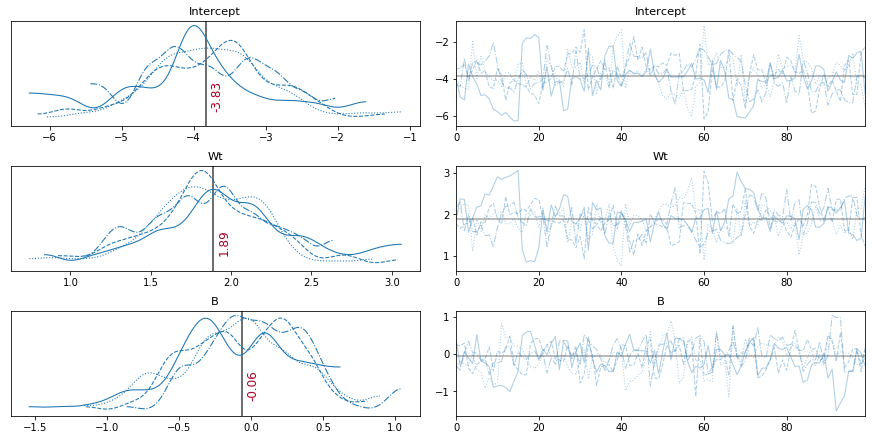

In [28]:
def plot_traces(traces, retain=0):
    '''
    Convenience function:
    Plot traces with overlaid means and values
    '''

    ax = pm.traceplot(traces[-retain:],
                      lines=tuple([(k, {}, v['mean'])
                                   for k, v in pm.summary(traces[-retain:]).iterrows()]))

    for i, mn in enumerate(pm.summary(traces[-retain:])['mean']):
        ax[i,0].annotate('{:.2f}'.format(mn), xy=(mn,0), xycoords='data'
                    ,xytext=(5,10), textcoords='offset points', rotation=90
                    ,va='bottom', fontsize='large', color='#AA0022')
plot_traces(trace);

# Frequentist logistic regression

In [29]:
model = sm.GLM(y, X, family = sm.families.Binomial(link = sm.families.links.logit))
res = model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      170
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -97.867
Date:                Thu, 13 Aug 2020   Deviance:                       195.73
Time:                        13:05:43   Pearson chi2:                     168.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.6815      0.905     -4.070      0.0

/Users/jinhwansuk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


# Exercise 7.12

In [30]:
Cured = [0 , 0, 3, 0, 6, 2, 5, 6, 2, 5]
Died = [6, 5, 3, 6, 0, 4, 1, 0, 0, 0]
Delay = ['None', '1.5h']*5
Level = ['1/8', '1/8', '1/4', '1/4', '1/2', '1/2', '1', '1', '4', '4']
df = pd.DataFrame({'C' : Cured, 'D' : Died, 'Delay' : Delay, 'Level' : Level})

In [31]:
df

,C,D,Delay,Level
0,0,6,None,1/8
1,0,5,1.5h,1/8
2,3,3,None,1/4
3,0,6,1.5h,1/4
4,6,0,None,1/2
5,2,4,1.5h,1/2
6,5,1,None,1
7,6,0,1.5h,1
8,2,0,None,4
9,5,0,1.5h,4
